In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
df = pd.read_csv("day.csv")
df['date'] = pd.to_datetime(df['dteday'])
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011-01-01
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011-01-02
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011-01-03
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011-01-04
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,2012-12-27
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,2012-12-28
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,2012-12-29
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,2012-12-30


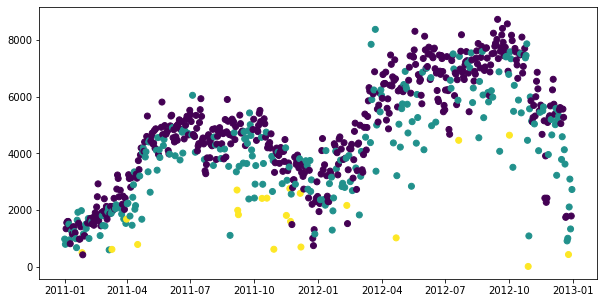

In [3]:
# df.plot.scatter(x='dteday', y='cnt')
plt.scatter(df['date'], df['cnt'], c = df['weathersit'])

In [4]:
df[df['weathersit']==1]['cnt'].mean()

4876.7861771058315

In [5]:
df[df['weathersit']==2]['cnt'].mean()

4035.862348178138

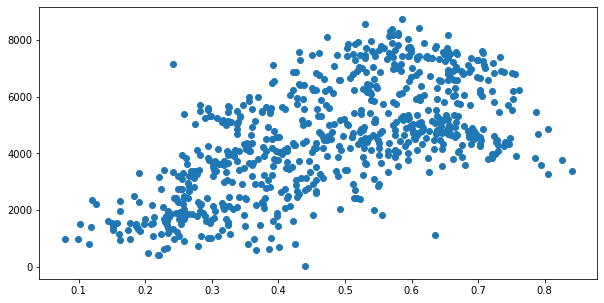

In [6]:
plt.scatter(df['atemp'], df['cnt'])

In [7]:
df[['cnt', 'atemp']].corr()

,cnt,atemp
cnt,1.000000,0.631066
atemp,0.631066,1.000000


In [8]:
df[['cnt', 'temp']].corr()

,cnt,temp
cnt,1.000000,0.627494
temp,0.627494,1.000000


In [9]:
df[['cnt', 'atemp', 'temp', 'hum', 'windspeed', 'weathersit']].corr()

,cnt,atemp,temp,hum,windspeed,weathersit
cnt,1.000000,0.631066,0.627494,-0.100659,-0.234545,-0.297391
atemp,0.631066,1.000000,0.991702,0.139988,-0.183643,-0.121583
temp,0.627494,0.991702,1.000000,0.126963,-0.157944,-0.120602
hum,-0.100659,0.139988,0.126963,1.000000,-0.248489,0.591045
windspeed,-0.234545,-0.183643,-0.157944,-0.248489,1.000000,0.039511
weathersit,-0.297391,-0.121583,-0.120602,0.591045,0.039511,1.000000


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()
lr.fit(df['atemp'].values.reshape(-1,1), df['cnt'].values.reshape(-1,1))

LinearRegression()

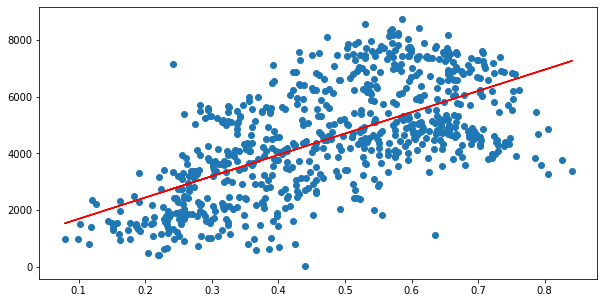

In [12]:
plt.scatter(df['atemp'], df['cnt'])
plt.plot(df['atemp'], lr.predict(df['atemp'].values.reshape(-1,1)), c='red')

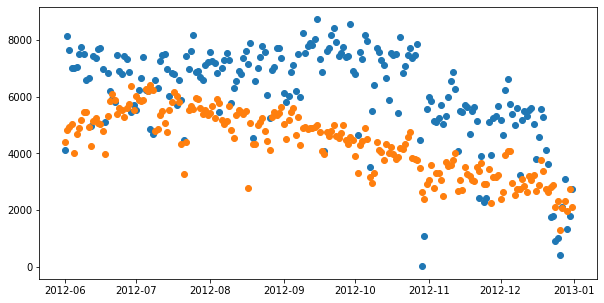

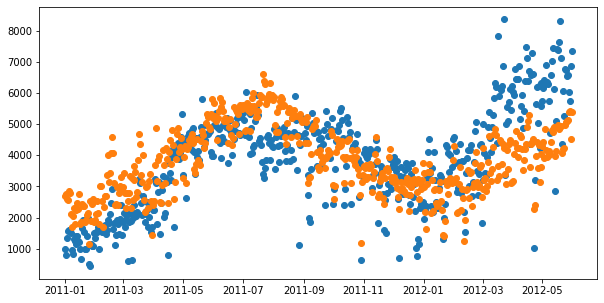

2186.2905025086116

In [13]:
training_set = df[df['date'] < '2012-06-01']
validation_set = df[df['date'] >= '2012-06-01']

training_inputs = training_set[['atemp', 'workingday', 'hum', 'weathersit']].values
training_outputs = training_set[['cnt']].values

validation_inputs = validation_set[['atemp', 'workingday', 'hum', 'weathersit']].values
validation_outputs = validation_set[['cnt']].values

lr = LinearRegression()
lr.fit(training_inputs, training_outputs)


# plt.scatter(lr.predict(validation_inputs), validation_outputs)
plt.scatter(validation_set['date'], validation_set['cnt'])
plt.scatter(validation_set['date'], lr.predict(validation_inputs))
plt.show()

plt.scatter(training_set['date'], training_set['cnt'])
plt.scatter(training_set['date'], lr.predict(training_inputs))
plt.show()

rmse = np.sqrt(((lr.predict(validation_inputs) - validation_outputs)**2).mean())
rmse

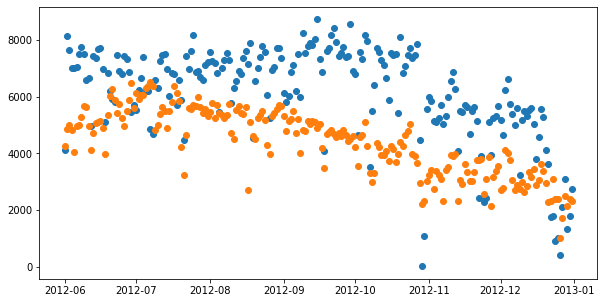

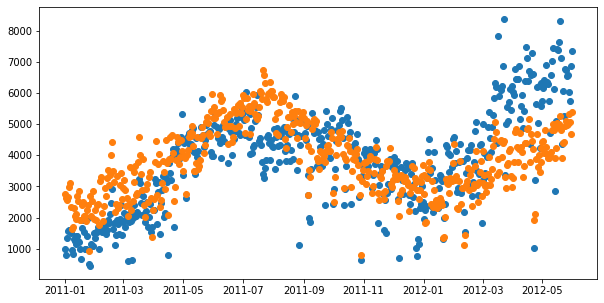

2139.2013624602373

In [14]:
training_set = df[df['date'] < '2012-06-01']
validation_set = df[df['date'] >= '2012-06-01']

training_inputs = training_set[['atemp', 'workingday', 'hum', 'weathersit', 'windspeed']].values
training_outputs = training_set[['cnt']].values

validation_inputs = validation_set[['atemp', 'workingday', 'hum', 'weathersit', 'windspeed']].values
validation_outputs = validation_set[['cnt']].values

lr = LinearRegression()
lr.fit(training_inputs, training_outputs)


# plt.scatter(lr.predict(validation_inputs), validation_outputs)
plt.scatter(validation_set['date'], validation_set['cnt'])
plt.scatter(validation_set['date'], lr.predict(validation_inputs))
plt.show()

plt.scatter(training_set['date'], training_set['cnt'])
plt.scatter(training_set['date'], lr.predict(training_inputs))
plt.show()

rmse = np.sqrt(((lr.predict(validation_inputs) - validation_outputs)**2).mean())
rmse

In [15]:
df['last_week']=(df['cnt'].cumsum() - df['cnt'].cumsum().shift(7))/7
df = df.dropna()
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date,last_week
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959,2011-01-08,1341.000000
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822,2011-01-09,1344.000000
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321,2011-01-10,1340.000000
10,11,2011-01-11,1,0,1,0,2,1,2,0.169091,0.191464,0.686364,0.122132,43,1220,1263,2011-01-11,1297.285714
11,12,2011-01-12,1,0,1,0,3,1,1,0.172727,0.160473,0.599545,0.304627,25,1137,1162,2011-01-12,1234.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,2012-12-27,1663.857143
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,2012-12-28,1588.428571
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,2012-12-29,1530.142857
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,2012-12-30,1531.428571


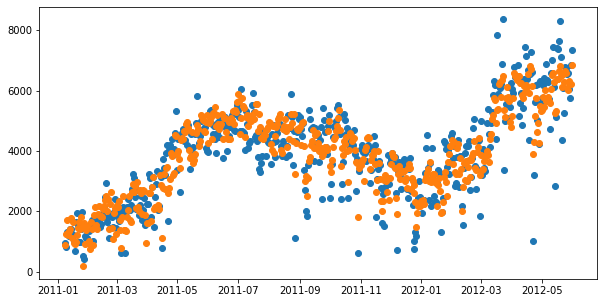

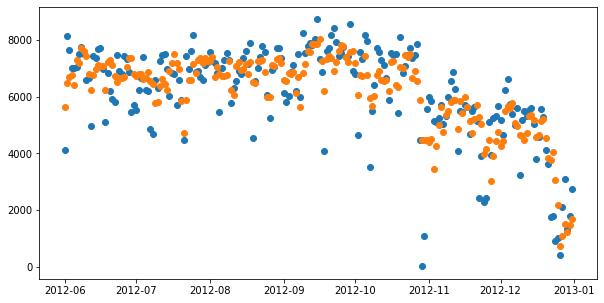

925.6635629822438

In [17]:
training_set = df[df['date'] < '2012-06-01']
validation_set = df[df['date'] >= '2012-06-01']

training_inputs = training_set[['atemp', 'workingday', 'hum', 'weathersit', 'last_week', 'windspeed']].values
training_outputs = training_set[['cnt']].values

validation_inputs = validation_set[['atemp', 'workingday', 'hum', 'weathersit', 'last_week', 'windspeed']].values
validation_outputs = validation_set[['cnt']].values

lr = LinearRegression()
lr.fit(training_inputs, training_outputs)

plt.scatter(training_set['date'], training_set['cnt'])
plt.scatter(training_set['date'], lr.predict(training_inputs))
plt.show()

# plt.scatter(lr.predict(validation_inputs), validation_outputs)
plt.scatter(validation_set['date'], validation_set['cnt'])
plt.scatter(validation_set['date'], lr.predict(validation_inputs))
plt.show()

rmse = np.sqrt(((lr.predict(validation_inputs) - validation_outputs)**2).mean())
rmse